# Kapittel 15

In [12]:
# Importerar bibliotek
import numpy as np

# Grenser (høgda)
a = 0
b = 60

def R(x):
    """Profil på tårn"""
    return 5+4/(1+np.exp((35-x)/1.5))*(np.sqrt(np.abs(x+ \
        1))-np.sqrt(31))**2

dx = 1e-3           # Liten verdi for numerisk derivasjon
def Rd(x):
    """Derivert"""
    return (R(x+dx)-R(x-dx))/(2*dx)

def int_volum(x):
    """Integrand for volumet"""
    return R(x)**2

def int_overflate(x):
    """Integrand for overflata"""
    return R(x) * np.sqrt(1+Rd(x)**2)


# Oppdeling
n = int(input('Gi oppdelinga n: '))
h = (b-a)/n                  # Steglengda

# Integrerer for å finne volum og overflate
# Bidrag frå endane
volum = h/2*(int_volum(a) + int_volum(b))
overflate = h/2*(int_overflate(a) + int_overflate(b))
# Resten av bidraga
for i in range(1, n):
    xi = a+i*h
    volum = volum + h*int_volum(xi)
    overflate = overflate + h*int_overflate(xi)
    
# Gange med rette faktorar til slutt
volum = np.pi*volum    
overflate = 2*np.pi*overflate

# Skriv volum og overflata til skjerm
print(f'Volum: {volum:.1f} m^3')
print(f'Overflate = {overflate:.1f} m^2')

Gi oppdelinga n:  1000


Volum: 19951.0 m^3
Overflate = 3978.1 m^2


In [9]:
"""Kode som bestemmer kor lang tid det å tømme ein tank.

Profilen til tanken er gitt ved R(x) under.
Vi tar utgangspunkt i Torricellis lov, V'(t) = -k sqrt(h).
"""

# Importerer NumPy
import numpy as np

# Startkrav:
t0 = 0
h0 = 60

# Parametrar
v_tot = 19951
k = 2*v_tot/(3*np.sqrt(h0))

def R(x):
    """Profilfunksjon"""
    return 5+4/(1+np.exp((35-x)/1.5)) * \
        (np.sqrt(x+1)-np.sqrt(31))**2

def F(x):
    """Høgresida i differensiallikninga"""
    return -k*np.sqrt(x)/(np.pi*R(x)**2)

# Steglengde
dt = float(input('Steglengda i tid: '))

# Initerer h og t
t = t0
h = h0

while h > 0:
    h = h+F(h)*dt       # Eulers metode
    t = t+dt

# Skriv slutttida til skjerm
print(f't = {t:.4f}')

Steglengda i tid:  0.000001


t = 1.9257


Oppdelinga:  1000


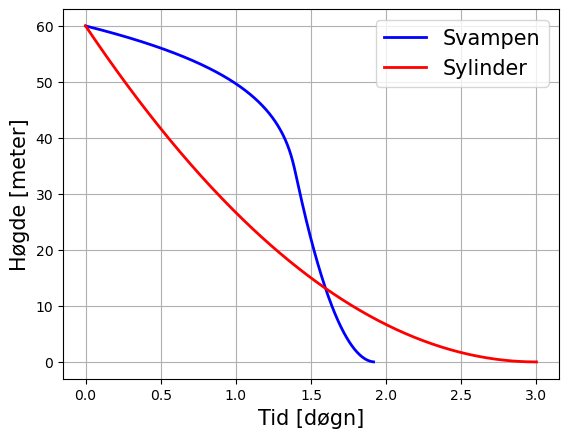

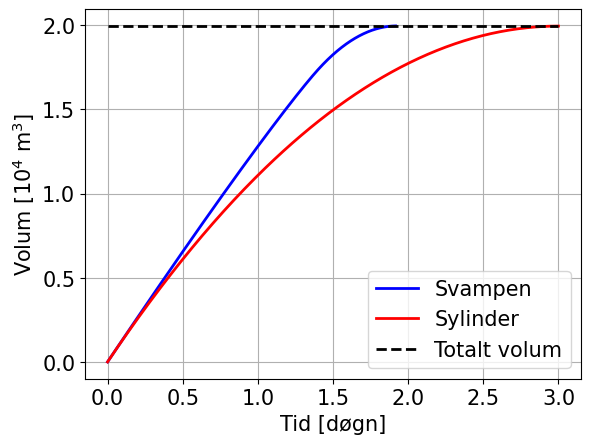

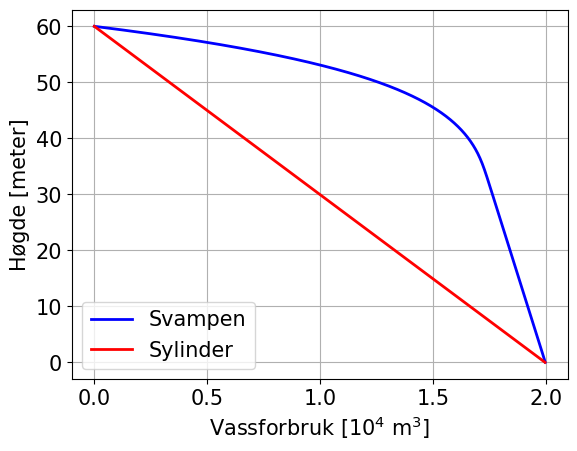

In [11]:
"""Denne implementeringa reknar ut vassforbruket 
som funksjon av tid for ein tank som blir tømd. 
Profilen til tanken er gitt ved R(x) under.
Vi tar utgongspunkt i Torrichellis lov, 
V'(t) = -k sqrt(h), for å bestemme høgda som 
funksjona av tid, som vi i sin tur brukar til 
å bestemme volumet av det som har runne ut ved 
integrasjon.

Vi plottar høgda av vatnet og volumet av vatnet
som har runne ut som fuksjonar av tid. Vi plottar
også høgda som funksjon av vassforbruk.
Dette gjer vi både for tanken med R(x)-profilen
og for ein sylinder-tank med same volum.
"""

# Bibliotek
import numpy as np
import matplotlib.pyplot as plt

# Startkrav:
t0 = 0
tf = 1.9160
h0 = 60

# Parametrar
v_tot = 19951
# Konstanten k:
k = 2*v_tot/(3*np.sqrt(h0))

# Initerar
t = t0
h = h0
volum = 0

def R(x):
    """Profil-funksjon"""
    return 5+4/(1+np.exp((35-x)/1.5))*(np.sqrt(x+1)-np.sqrt(31))**2

def F(x):
    """Høgresida i differensaillikninga h'=F(h)"""
    return -k*np.sqrt(x)/(np.pi*R(x)**2)

# Oppdeling i Eulers-metode og Riemann-integrasjon
N = int(input('Oppdelinga: '))
dt = (tf-t0)/N

# Vektorar til plotting
t_vektor = np.arange(t0, tf+dt, dt)
h_vektor = np.zeros(N+1)
h_vektor[0] = h0
volum_vektor = np.zeros(N+1)
volum_vektor[0] = 0

for n in range(0, N):
    # Eulers metode
    h = h+F(h)*dt
    h = np.max([h, 0])      # Hindrar h frå å bli negativ
    h_vektor[n+1] = h
    # Oppdaterar volum ved eit Riemann-integral
    volum = volum+k*np.sqrt(h)*dt
    volum_vektor[n+1] = volum

# Plottar resultatet
plt.plot(t_vektor, np.real(volum_vektor)/1e4, 'b-', linewidth=2, label="Svampen")

# Reknar ut volum og høgde som funksjonar av tid
# for sylindertårnet
H = 60                                 # Høgde

def hoegde_sylinder(t):
    """Funksjon for vasshøgda i sylindertårn"""
    return (np.sqrt(H)-k*H/2/v_tot*t)**2
 
def volum_sylinder(t):
    """Funksjon for vassforbruk i sylindertårn"""
    return k*np.sqrt(H)*t-k**2*H/(4*v_tot)*t**2
    
tid_sylinder = np.arange(0, 3 + 1e-2, 1e-2)      # Tids-vektor

#
# Lagar plott - tre stykker
#

# Plottar høgder som funksjon av tid
plt.figure(1)
plt.clf()
# Numerisk løysing for Svampen 
plt.plot(t_vektor, h_vektor, 'b-', linewidth=2, 
     label='Svampen')
# Analytisk løysing for sylinder
plt.plot(tid_sylinder, hoegde_sylinder(tid_sylinder), 
     'r-', linewidth=2, label='Sylinder')
plt.rcParams.update({'font.size': 15})
plt.xlabel('Tid [døgn]', fontsize=15)
plt.ylabel('Høgde [meter]', fontsize=15)
plt.grid(visible=True)
plt.legend(loc='upper right')
plt.show()

# Plottar vassforbruk som funksjon av tid
plt.figure(2)
plt.clf()
# Numerisk løysing for Svampen 
plt.plot(t_vektor, volum_vektor/1e4, 'b-', linewidth=2, 
     label='Svampen')
# Analytisk løysing for sylinder
plt.plot(tid_sylinder, volum_sylinder(tid_sylinder)/1e4, 
     'r-', linewidth=2, label='Sylinder')
# Totalt volum
plt.hlines(v_tot/1e4, 0, 3, color='black', linestyle='dashed', 
           linewidth=2, label='Totalt volum')
plt.rcParams.update({'font.size': 15})
plt.xlabel('Tid [døgn]', fontsize=15)
plt.ylabel('Volum [10$^4$ m$^3$]', fontsize=15)
plt.grid(visible=True)
plt.legend(loc='lower right')
plt.show()

# Plottar høgde mot vassforbruk
plt.figure(3)
plt.clf()
# Numerisk løysing for Svampen 
plt.plot(volum_vektor/1e4, h_vektor, 'b-', linewidth=2, 
     label='Svampen')
# Analytisk løysing for sylinder
plt.plot(volum_sylinder(tid_sylinder)/1e4, 
         hoegde_sylinder(tid_sylinder),'r-', 
         linewidth=2, label='Sylinder')
plt.rcParams.update({'font.size': 15})
plt.xlabel('Vassforbruk [10$^4$ m$^3$]', fontsize=15)
plt.ylabel('Høgde [meter]', fontsize=15)
plt.grid(visible=True)
plt.legend(loc='lower left')
plt.show()